# Ecuación de Poisson en 1D 

Aplicaremos el método de elementos finitos a un problema electrostático con condiciones de frontera en una dimensión para ejemplificar el uso del método de elementos finitos y los pasos a seguir.


**Problema en 1D:** Considere dos placas conductoras infinitas paralelas que se posicionan perpendicularmente al eje $x$ y separadas por una distancia $d$, como se muestra en la figura. Una placa tiene un potencial eléctrico constante $V = V_0$ y la otra un potencial $V = 0$. La region entre las placas está llena de un medio no magnético con una constante dieléctrica relativa $\varepsilon_{r}$ y una densidad volumétrica $\rho_{v} = -\rho_{0}$. Obtener las soluciones analítica y por elementos finitos para el potencial eléctrico en la región comprendida entre las dos placas.

![](./figures/1dpoisson.png)

### Solución Analítica

El potencial eléctrico está governado por la ecuación de Poisson
$$\nabla\cdot(\varepsilon_{r}\nabla V) = -\frac{\rho_{v}}{\varepsilon_{0}}$$

Condiciones de frontera:
$$V(0) = V_{0}$$
$$V(d) = 0$$

Para un medio homogéneo y lineal en una dimensión, escribimos la ecuación de Poisson como
$$\frac{d^{2}V}{dx^{2}} = \frac{\rho_{0}}{\varepsilon_{r}\varepsilon_{0}}$$

donde $\rho_{v} = -\rho_{0}$. Integrando dos veces se obtiene
$$ V(x) = \frac{\rho_{0}}{2\varepsilon_{r}\varepsilon_{0}}x^{2} + c_{1}x + c_{0}$$

donde $c_{1}$ y $c_{0}$ son constantes que se determinan mediante las condiciones de frontera *(condiciones de Dirichlet)*. Así se obtiene
$$ V(x) = \frac{\rho_{0}}{2\varepsilon_{r}\varepsilon_{0}}x^{2} - \left(\frac{\rho_{0}d}{2\varepsilon_{r}\varepsilon_{0}} + \frac{V_{0}}{d}\right)x + V_{0}$$

# Solución con el Método de Elementos Finitos

Este problema corresponde a una línea recta en el eje $x$. Se discretiza este dominio dividiendolo en $N_{e}$ elementos finitos y $N_{n}$ nodos. Los elementos que se muestran en la figura están encerrados en un circulo.

![](./figures/1d-discret.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['text.usetex'] = True  # Uncomment to render pyplot text as LaTeX
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)

In [2]:
# Parameters for analytical solution
e0 = 8.85e-12       # F/m
er = 1              # Relative permittivity
e = er*e0
V0 = 1              # V
d = 8e-2            # m  (8 cm)
rho0 = 1e-8         # C/m

In [3]:
NoN = 10            # Number of Nodes
NoE = NoN - 1       # Number of Elements

xn = np.linspace(0, d, NoN)
yn = np.zeros(NoN)

NL = np.array([xn, yn]).T   #Node List
EL = np.zeros([NoE, 2]).astype('int64') #Element List

for j in range(2):
    for i in range(NoE):
        EL[i,j] = i + j + 1


print('Node list \n', NL)Mount SSD in Linux
print('\n')
print('Element list \n', EL)

Node list 
 [[0.         0.        ]
 [0.00888889 0.        ]
 [0.01777778 0.        ]
 [0.02666667 0.        ]
 [0.03555556 0.        ]
 [0.04444444 0.        ]
 [0.05333333 0.        ]
 [0.06222222 0.        ]
 [0.07111111 0.        ]
 [0.08       0.        ]]


Element list 
 [[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]


## Ensamblaje del sistema matricial

In [4]:
K = np.zeros([NoN, NoN])
f = np.zeros(NoN)
le = np.zeros(NoE)

for i in range(NoE):
    le[i] = xn[EL[i,1]-1] - xn[EL[i,0]-1]
    
#Global Assembly
for i in range(NoE):
    #Stiffness matrix
    K[EL[i,0]-1, EL[i,0]-1] = K[EL[i,0]-1, EL[i,0]-1] + e/le[i]
    K[EL[i,0]-1, EL[i,1]-1] = K[EL[i,0]-1, EL[i,1]-1] - e/le[i]
    K[EL[i,1]-1, EL[i,0]-1] = K[EL[i,1]-1, EL[i,0]-1] - e/le[i]
    K[EL[i,1]-1, EL[i,1]-1] = K[EL[i,1]-1, EL[i,1]-1] + e/le[i]
    #force vector
    f[EL[i,0]-1] = f[EL[i,0]-1] - le[i]*rho0/2
    f[EL[i,1]-1] = f[EL[i,1]-1] - le[i]*rho0/2

print('Stiffness matrix')    
print(K)
print('\n')
print('Voltage vector') 
print(f)

Stiffness matrix
[[ 9.95625e-10 -9.95625e-10  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [-9.95625e-10  1.99125e-09 -9.95625e-10  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00 -9.95625e-10  1.99125e-09 -9.95625e-10  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -9.95625e-10  1.99125e-09 -9.95625e-10
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -9.95625e-10  1.99125e-09
  -9.95625e-10  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00 -9.95625e-10
   1.99125e-09 -9.95625e-10  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  -9.95625e-10  1.99125e-09 -9.95625e-10  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+

## Condiciones de frontera

Se imponen haciendo que el resultado para la primera fila y la ultima de la matriz $K$ sean cero, excepto los valores en los extremos que deben cer iguales a 1.

In [5]:
#Boundary conditions
# first node
K[0,0] = 1
f[0] = V0
for i in range(1,NoN):
    K[0,i] = 0
    
# last node    
K[NoN -1,NoN -1] = 1
f[NoN -1] = 0
for i in range(NoN -1):
    K[NoN-1,i] = 0
    
print('Stiffness matrix')    
print(K)
print('\n')
print('Solution vector') 
print(f)

Stiffness matrix
[[ 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [-9.95625e-10  1.99125e-09 -9.95625e-10  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00 -9.95625e-10  1.99125e-09 -9.95625e-10  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -9.95625e-10  1.99125e-09 -9.95625e-10
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -9.95625e-10  1.99125e-09
  -9.95625e-10  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00 -9.95625e-10
   1.99125e-09 -9.95625e-10  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  -9.95625e-10  1.99125e-09 -9.95625e-10  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+

## Solución del Sistema Matricial

In [6]:
V_sol = np.linalg.solve(K,f)

## Visulaización

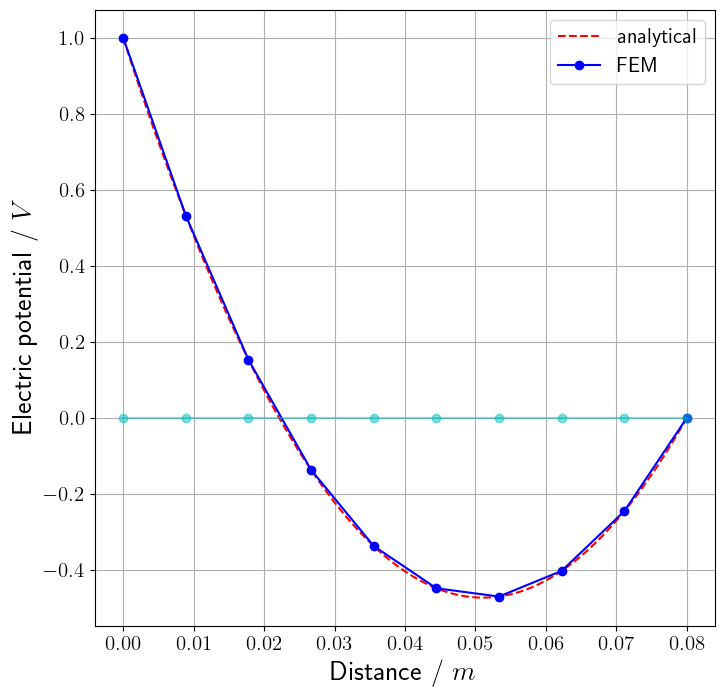

In [7]:
x = np.linspace(0, d, 100)
V = (rho0/(2*er*e0))*np.power(x, 2) - (rho0*d/(2*er*e0) + V0/d)*x + V0

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(x, V, 'r--', label='analytical')
ax.plot(xn, V_sol, 'bo-', label='FEM')
ax.plot(xn, yn, 'co-', alpha=0.5)
ax.grid(True)
ax.set_xlabel(r'Distance / $m$')
ax.set_ylabel(r'Electric potential / $V$')
ax.legend()